In [1]:
import pandas
from pandas import DataFrame
import statistics
import random
from random import sample
from statistics import mean
from matplotlib.pyplot import yscale, xscale, title, plot, grid, legend, xlabel, ylabel
from collections import Counter
import string
import copy
from string import *
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import zhon
from zhon import hanzi
from nltk.util import ngrams
import collections
import wordninja
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import numpy as np
import sklearn
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate as tb
from sklearn.metrics import precision_recall_fscore_support as score
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wjian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wjian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Task 1: Exploratory Data analysis
### Define a function that can read in the tweets data and put it into a dataframe.

In [2]:
def read_data(path):
    # Read in every line of the INPUT file
    with open(path,encoding = 'utf-8', mode = 'r') as f:
        raw_data = f.readlines()    
        
    # Put the data into a dataframe that contain 'id','label' and 'text'
    split_data = []
    for x in raw_data:
        cell = x.lower().split('\t') #lower case
        #Also get rid off every '\n'
        cell[-1] = re.sub('\\n$','',cell[-1])
        split_data.append(cell)

    for x in range(len(split_data)):
        if len(split_data[x]) == 4:
            split_data[x][2] = ' '.join([split_data[x][2],split_data[x][3]])
            split_data[x].remove(split_data[x][3])
        
    return(DataFrame(split_data, columns=['id','label','text']))

### Read the INPUT file and get the total number of tweets.

In [3]:
df_input = read_data('./data/Dev/INPUT.txt')
total_tweets = len(df_input)
total_tweets

12284

### Get the total number of characters (including spaces).

In [4]:
total_chars = 0
for tweet in df_input['text']:
    total_chars += len(tweet)
total_chars

1344052

### Get the average number of characters in each tweet (including spaces).

In [5]:
total_chars/total_tweets

109.41484858352328

### Get the total number of distinct words (vocabulary).

### (We split hashtags into words)

In [6]:
# First, tokenize each tweet.
def tokenization(df):
    tokenizer = TweetTokenizer()
    tweets =[]
    for x in df['text']:
        tweets.append(tokenizer.tokenize(x))
    return(tweets)
tokenized_input = tokenization(df_input)

In [7]:
def normalization(ls):
    # Split the hashtags into words
    for tweet in ls:
        new_list = []
        for token in tweet:
            if re.match('^#.+', token): # Start with a '#'
                new_list.extend(wordninja.split(token))
            else:
                new_list.append(token)
        ls[ls.index(tweet)] = new_list
    # Get words.
    for tweet in ls:
        new_list = []
        for token in tweet:
            if re.search('[\d\/]', token): # contian any number or '/'(often used in an url)
                pass
            elif re.match('^@.+', token): # remove the "@", 
                new_list.append(re.sub('@','',token))
            elif re.search('[\W]', token): # contain non-alphabet character
                if re.match('[a-z]+(?:-[a-z]+)*', token): # word with internal hyphens
                    new_list.extend(wordninja.split(token))
                elif re.match('(?:[a-z]\.)+', token): # abbreviation
                    new_list.append(token)
                else:
                    pass
            else:
                new_list.append(token)
        ls[ls.index(tweet)] = new_list
    return(ls)
normalized_input = normalization(tokenized_input)

In [8]:
def get_all(ls):
    words =[]
    for x in ls:
        for y in x:
            words.append(y)
    return words
all_words = get_all(normalized_input)
total_words = len(all_words)

### Get the average number of words in each tweet.

In [9]:
total_words/total_tweets

15.35070009768805

### Get the average number and standard deviation of characters per token.

In [10]:
nums = []
for word in all_words:
    nums.append(len(word))
print("average number:{:.2f}, standard deviation:{:.2f}.".format(np.mean(nums),np.std(nums)))

average number:4.89, standard deviation:2.70.


### Get the total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary.

In [11]:
counts = Counter(all_words)
print(counts.most_common(10))

[('the', 6204), ('to', 3829), ('a', 3218), ('is', 2718), ('of', 2656), ('and', 2586), ('in', 2382), ('for', 1982), ('i', 1920), ('on', 1449)]


In [12]:
total_words/len(counts)

8.487936622254232

### Get the total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4,5. 

In [13]:
def ngram_words(df, n):
    n_grams = []
    for tweet in df:
        for item in ngrams(tweet,n):
            n_grams.append(item)
    return(len(Counter(n_grams)))
print(ngram_words(tokenized_input, 2))
print(ngram_words(tokenized_input, 3))
print(ngram_words(tokenized_input, 4))
print(ngram_words(tokenized_input, 5))

110042
147298
146700
137551


### Get the total number of distinct n-grams of characters that appear for n=2,3,4,5,6,7 (Optional).

In [14]:
def ngram_characters(df, n):
    n_grams = []
    for tweet in df:
        for token in tweet:
            for item in ngrams(token,n):
                n_grams.append(item)
    return(len(Counter(n_grams)))
print(ngram_characters(tokenized_input, 2))
print(ngram_characters(tokenized_input, 3))
print(ngram_characters(tokenized_input, 4))
print(ngram_characters(tokenized_input, 5))
print(ngram_characters(tokenized_input, 6))
print(ngram_characters(tokenized_input, 7))

795
8745
29615
44494
44618
37961


Text(0.5, 1.0, 'Frequency of n-th most frequent word and 1/n line.')

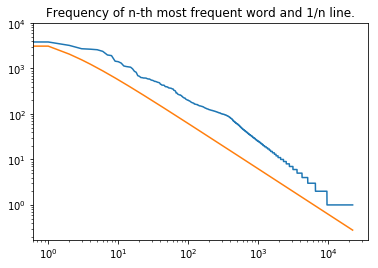

In [15]:
M = counts.most_common(1)[0][1]
plot([c for (w, c) in counts.most_common()])
plot([M/i for i in range(1, len(counts)+1)])
yscale('log'); xscale('log')
title('Frequency of n-th most frequent word and 1/n line.')

### Read the dev file, train file and devtest file. They are the training data.

In [16]:
df_dev = read_data('./data/Gold/dev.txt')
df_train = read_data('./data/Gold/train.txt')
df_devtest = read_data('./data/Gold/devtest.txt')
df_test = read_data('./data/Gold/test.txt')

In [17]:
# Merge the gold dataset and do tokenization and normalization.
df_gold = pandas.concat([df_train,df_dev,df_devtest])
tokenized_gold = tokenization(df_gold)
normalized_gold = normalization(tokenized_gold)
df_gold["tokens"] = normalized_gold

### Get out-of-vocabulary words that appear in INPUT file but not in training data.

In [18]:
all_words_gold = []
for tweet in normalized_gold:
    for token in tweet:
        all_words_gold.append(token)
out_of_vocabulary = set(all_words) - set(all_words_gold)
len(out_of_vocabulary)

13839

In [19]:
### Look at the vocabulary growth (types) combining 4 gold data sets against the input data.

In [20]:
# Combine 4 gold data and do tokenization and normal 
df_combine = pandas.concat([df_train,df_dev,df_devtest,df_test])
tokenized_combine = tokenization(df_combine)
normalized_combine = normalization(tokenized_combine)

# Given a list of words from a corpus, separate the counts of tokens and types in time. Return the two lists.
def separate_tokens_types(words):
    t_d = {}
    tokens, types = [], []
    count = 0
    for i in range(len(words)):
        if words[i] not in t_d:
            count += 1
            t_d[words[i]] = 1
        tokens.append(i + 1)
        types.append(count)

    return tokens, types

Text(0, 0.5, 'Num types')

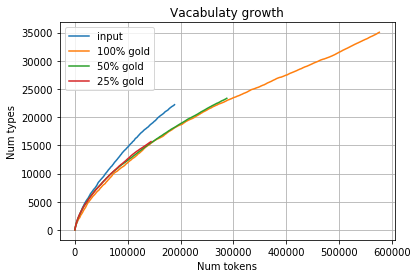

In [21]:
# Seprate gold data at random
all100 = get_all(tokenized_combine)
all50 = get_all(sample(tokenized_combine, round(0.5*len(tokenized_combine))))
all25 = get_all(sample(tokenized_combine, round(0.25*len(tokenized_combine))))

t_tokens, t_types = separate_tokens_types(all_words)
t_tokens100, t_types100 = separate_tokens_types(all100)
t_tokens50, t_types50 = separate_tokens_types(all50)
t_tokens25, t_types25 = separate_tokens_types(all25)

# Plot the vacabulaty growth
plot(t_tokens, t_types, label='input')
plot(t_tokens100, t_types100, label='100% gold')
plot(t_tokens50, t_types50, label='50% gold')
plot(t_tokens25, t_types25, label='25% gold')

grid()
legend()
title("Vacabulaty growth")
xlabel('Num tokens')
ylabel('Num types')

### What is the class distribution of the training data set?

In [22]:
df_gold["label"].value_counts()

positive    4931
neutral     3489
negative    1579
Name: label, dtype: int64

### Look at the difference between the top word types across these three classes.

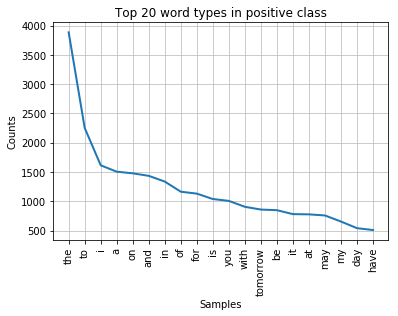

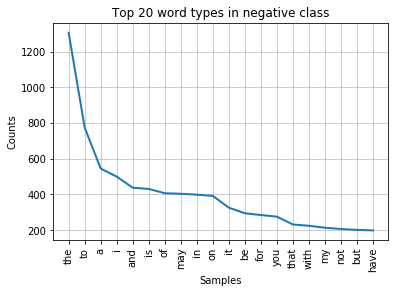

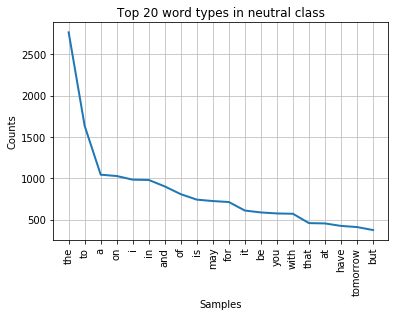

In [23]:
pos = df_gold.loc[df_gold["label"] == "positive", "tokens"]
neg = df_gold.loc[df_gold["label"] == "negative", "tokens"]
neutral = df_gold.loc[df_gold["label"] == "neutral", "tokens"]
pos_words = FreqDist(get_all(pos))
neg_words = FreqDist(get_all(neg))
neutral_words = FreqDist(get_all(neutral))
title('Top 20 word types in positive class')
pos_words.plot(20, cumulative=False)
title('Top 20 word types in negative class')
neg_words.plot(20, cumulative=False)
title('Top 20 word types in neutral class')
neutral_words.plot(20, cumulative=False)

### What words are particularly characteristic of your training set and dev set? Are they the same? 

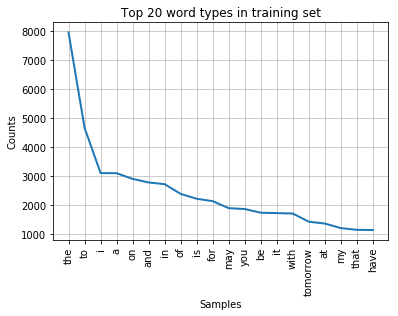

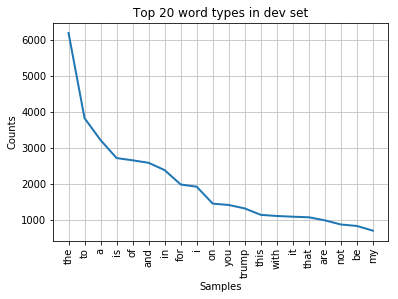

In [24]:
training_words = FreqDist(get_all(df_gold["tokens"]))
dev_words = FreqDist(all_words)
title('Top 20 word types in training set')
training_words.plot(20, cumulative=False)
title('Top 20 word types in dev set')
dev_words.plot(20, cumulative=False)

The top 20 words of training set and dev set both contain lots of stopwords like "the","to","I","a", but they are not the same. The most frequent noun in traing set is "tommorrow", while the most frequent noun in dev set is "Trump".

# Task 2: Message Polarity

### Clean the traning data and test data.

In [25]:
# "punc" contains all punctuations, including full-width punctuations like Chinese.
punc = string.punctuation + zhon.hanzi.punctuation
punc = '[' + punc + ']'

stopworddic = set(stopwords.words('english')) 

### We used regex and lemmatization to clean the data

In [26]:
# We have tokenized the traing data in part 1.
# Clean it for further analysis.
def clean(ls):
    for tweets in ls:
        new_list = []
        for token in tweets:
            # Remove # and @ in hashtags.
            if re.match('^[#@].+', token):
                new_list.append(re.sub('[#@]','', token))
            # Remove all tokens with numbers or /.
            elif re.search('[\d\/]', token):
                pass
            # Remove urls.
            elif re.match('^http+', token):
                pass
            # Remove all other punctuations.
            elif token[0] in punc:
                pass
            else:
                new_list.append(token)
        ls[ls.index(tweets)] = new_list
    
    # Remove stopwords and short words
    for tweets in ls:
        new_list = []
        for token in tweets:
            if token not in stopworddic and len(token) > 1:
                new_list.append(token)
        ls[ls.index(tweets)] = new_list
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    for tweets in ls:
        tagged_sent = pos_tag(tweets) 
        lemmas_sent = []
        for tag in tagged_sent:
            wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
            lemmas_sent.append(lemmatizer.lemmatize(tag[0], pos=wordnet_pos))
        ls[ls.index(tweets)] = lemmas_sent
    return(ls)

# Get the POS of a word
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [27]:
# Put cleaned words into sentences and back into dataframe.
def join_words(words_list,df):
    sentence = []
    for x in words_list:
        sentence.append(' '.join(y for y in x))
    df['text'] = sentence
    return(df)

df_gold = join_words(clean(tokenized_gold),df_gold)

In [28]:
# Clean the test data.
tokenized_test = tokenization(df_test)
cleaned_words_test = clean(tokenized_test)
df_test = join_words(cleaned_words_test,df_test)

### Naive Bayes Classifier

In [29]:
# Feature function
def features(sentence):
    words = sentence.lower().split()
    return dict(('contains(%s)' % w, True) for w in words)

# Features extraction
pos_tweets = df_gold.loc[df_gold["label"] == "positive", "text"]
neg_tweets = df_gold.loc[df_gold["label"] == "negative", "text"]
neutral_tweets = df_gold.loc[df_gold["label"] == "neutral", "text"]

positive_featuresets = [(features(tweet),'positive') for tweet in pos_tweets]
negative_featuresets = [(features(tweet),'negative') for tweet in neg_tweets]
neutral_featuresets = [(features(tweet),'neutral') for tweet in neutral_tweets]
training_features = positive_featuresets + negative_featuresets + neutral_featuresets

# Training classifier
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_features)

Training classifier


In [30]:
# Build the truth_list, from lecture note
truth_list_test = list(df_test[['text', 'label']].itertuples(index=False, name=None))
for i, (text, expected) in enumerate(truth_list_test):
    text_feats = features(text)
    truth_list_test[i] = (text_feats, expected)
# Perform the test
sentiment_analyzer.evaluate(truth_list_test,classifier)

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.49646180690189995,
 'Precision [negative]': 0.3324547531189598,
 'Recall [negative]': 0.5855772206747137,
 'F-measure [negative]': 0.4241201524321901,
 'Precision [neutral]': 0.6329521086490351,
 'Recall [neutral]': 0.34248694643202476,
 'F-measure [neutral]': 0.44447233027983435,
 'Precision [positive]': 0.5146067415730337,
 'Recall [positive]': 0.6812579685507862,
 'F-measure [positive]': 0.5863204096561814}

In [31]:
# Show bayes results.
results = []
for item in truth_list_test:
    results.append(classifier.classify(item[0]))
results
None

### Vader

In [32]:
analyzer = SentimentIntensityAnalyzer()
with open('./data/Gold/test.txt', 'r') as dataset:
    my_lines = dataset.readlines()

Y_predicton_vadar = []
Y_true = []
for my_sentence in my_lines:
    my_sentence = my_sentence.strip().split('\t')
    id, label, text = my_sentence[0], my_sentence[1], ' '.join(my_sentence[2:])
    vs = analyzer.polarity_scores(text)
    
    vs_score = vs['compound']
    if vs_score >= 0.05:
        Y_predicton_vadar.append('positive')
    elif vs_score > -0.05:
        Y_predicton_vadar.append('neutral')
    else:
        Y_predicton_vadar.append('negative')
    Y_true.append(label)
    
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true=Y_true, y_pred=Y_predicton_vadar,target_names=target_names))

              precision    recall  f1-score   support

    positive       0.39      0.63      0.48      3231
     neutral       0.66      0.38      0.48     10342
    negative       0.50      0.68      0.57      7059

    accuracy                           0.52     20632
   macro avg       0.52      0.56      0.51     20632
weighted avg       0.57      0.52      0.51     20632



### Multinomial test

In [33]:
X_train = df_gold['text']
Y_train = df_gold['label']
vectorizer = CountVectorizer(lowercase=False)
X_dev = df_test['text']
Y_dev = df_test['label']

In [34]:
# learn training data vocabulary, then use it to create a document-term matrix

# fit
vectorizer.fit(X_train)

# transform training data
X_train_dtm = vectorizer.transform(X_train)

In [35]:
#vectorize test data
X_test_dtm = vectorizer.transform(X_dev)

In [36]:
#Train model
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(X_train_dtm, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
Y_prediction_multi = nb.predict(X_test_dtm)
target_names = ['positive', 'neutral', 'negative']
MTN = classification_report(y_true=Y_dev, y_pred=Y_prediction_multi, target_names=target_names,output_dict=True)
print(classification_report(y_true=Y_dev, y_pred=Y_prediction_multi, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.49      0.22      0.31      3231
     neutral       0.61      0.37      0.47     10342
    negative       0.46      0.84      0.59      7059

    accuracy                           0.51     20632
   macro avg       0.52      0.48      0.46     20632
weighted avg       0.54      0.51      0.48     20632



### Logistic regression

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train_dtm, Y_train)
None

C:\Users\wjian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wjian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
Y_prediction_log = logreg.predict(X_test_dtm)
target_names = ['positive', 'neutral', 'negative']
LGR = classification_report(y_true=Y_dev, y_pred=Y_prediction_log, target_names=target_names,output_dict=True)
print(classification_report(y_true=Y_dev, y_pred=Y_prediction_log, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.44      0.30      0.36      3231
     neutral       0.61      0.43      0.50     10342
    negative       0.47      0.75      0.58      7059

    accuracy                           0.52     20632
   macro avg       0.51      0.49      0.48     20632
weighted avg       0.54      0.52      0.51     20632



### Algorithm optimization
we combined vader, multinomial, and logistic regression. When two or more results are the same, we would use this result. When all results are different, we use result from vader, since it has the highest accuracy.

The following block shows optimization result for "test.txt" file

In [41]:
def summarize(v, m, l):
    output = []
    for i in range(len(v)):
        ls = [v[i], m[i], l[i]]
        if Counter(ls).most_common()[0][1] == 1:
            if m[i] == "negative":
                output.append("negative")    
            else:
                output.append(v[i])
        else:
            output.append(Counter(ls).most_common()[0][0])
    return(output)

Y_prediction_sum = summarize(Y_predicton_vadar, Y_prediction_multi, Y_prediction_log)
print(classification_report(y_true=Y_dev, y_pred=Y_prediction_sum, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.46      0.38      0.42      3231
     neutral       0.64      0.38      0.48     10342
    negative       0.49      0.81      0.61      7059

    accuracy                           0.53     20632
   macro avg       0.53      0.52      0.50     20632
weighted avg       0.56      0.53      0.51     20632



# Task 3: Performance evaluation

## F-measure Table

In [42]:
NBT = sentiment_analyzer.evaluate(truth_list_test,classifier)

Evaluating NaiveBayesClassifier results...


In [43]:
VAD = classification_report(y_true=Y_true, y_pred=Y_predicton_vadar,target_names=target_names,output_dict=True)

In [44]:
table1=[
    ['Accuracy',NBT['Accuracy'],VAD['accuracy'],MTN['accuracy'],LGR['accuracy']],
    ['Positive Precision',NBT['Precision [positive]'],VAD['positive']['precision'],MTN['positive']['precision'],LGR['positive']['precision']],
    ['Positive Recall',NBT['Recall [positive]'],VAD['positive']['recall'],MTN['positive']['recall'],LGR['positive']['recall']],
    ['Positive f1-score',NBT['F-measure [positive]'],VAD['positive']['f1-score'],MTN['positive']['f1-score'],LGR['positive']['f1-score']],
    
    ['Negative Precision',NBT['Precision [negative]'],VAD['negative']['precision'],MTN['negative']['precision'],LGR['negative']['precision']],
    ['Negative Recall',NBT['Recall [negative]'],VAD['negative']['recall'],MTN['negative']['recall'],LGR['negative']['recall']],
    ['Negative f1-score',NBT['F-measure [negative]'],VAD['negative']['f1-score'],MTN['negative']['f1-score'],LGR['negative']['f1-score']],
    
    ['Neutral Precision',NBT['Precision [neutral]'],VAD['neutral']['precision'],MTN['neutral']['precision'],LGR['neutral']['precision']],
    ['Neutral Recall',NBT['Recall [neutral]'],VAD['neutral']['recall'],MTN['neutral']['recall'],LGR['neutral']['recall']],
    ['Neutral f1-score',NBT['F-measure [neutral]'],VAD['neutral']['f1-score'],MTN['neutral']['f1-score'],LGR['neutral']['f1-score']],
]
print(tb(table1, headers=['Score','Bayes','Vader','Multinomial','Logistic']))

Score                  Bayes     Vader    Multinomial    Logistic
------------------  --------  --------  -------------  ----------
Accuracy            0.496462  0.518806       0.509112    0.516722
Positive Precision  0.514607  0.391995       0.493489    0.437669
Positive Recall     0.681258  0.63355        0.222841    0.299907
Positive f1-score   0.58632   0.484325       0.307036    0.355923
Negative Precision  0.332455  0.498798       0.459969    0.47335
Negative Recall     0.585577  0.676158       0.836662    0.749823
Negative f1-score   0.42412   0.574092       0.593598    0.580341
Neutral Precision   0.632952  0.664955       0.612348    0.607933
Neutral Recall      0.342487  0.375556       0.374976    0.425353
Neutral f1-score    0.444472  0.48001        0.465127    0.500512


## Average Recall Table

In [45]:
table2=[
    ['Average Recall',
    mean([NBT['Recall [positive]'],NBT['Recall [negative]'],NBT['Recall [neutral]']]),
    mean([VAD['positive']['recall'],VAD['negative']['recall'],VAD['neutral']['recall']]),
    mean([MTN['positive']['recall'],MTN['negative']['recall'],MTN['neutral']['recall']]),
    mean([LGR['positive']['recall'],LGR['negative']['recall'],LGR['neutral']['recall']])
    ]
]
print(tb(table2, headers=['Score','Bayes','Vader','Multinomial','Logistic']))

Score              Bayes     Vader    Multinomial    Logistic
--------------  --------  --------  -------------  ----------
Average Recall  0.536441  0.561755        0.47816    0.491694


### Speculate on the differences between the two performance measures above
F-measure would give a more comprehensive measure than recall does. So we could see which specific part has a better performance.

### Look at your results and find / show examples where your classifiers have mis-performed. What sorts of phenomena do you see and speculate on why you see these errors. Are there distinct differences between classifiers or are differences difficult to see from your results?
From the results above, we could see Multinomial and Logistic Regression has very low positive recall scores, when compared to those from Bayes and Vader. The potential reason for this could be that there are too many misidentified positive tweets. This implies the these two regression methods are weak on evaluation on positive tweets.

### How important was tokenization / feature extraction?
Tokenization/feature extraction are important that they would remove many words that serves very little to the inclination of tweets. They would setup a solid base for algorithms to perform analysis. 

### If you had more time, what might you do differently? What questions do you know have about your analysis that you didn't have before starting?
If we had more time, we would make the training data more balanced, since here we have many positive tweets that makes the data unbalanced. 

We are now curious about the results from Naive Bayes and Multinomial Naive Bayes. The results should be very close to each other, since these two methods stem from the same concept. However, it turns out they differs a lot.  

# Answers for INPUT

### We use the optimization method from above to decide label for INPUT

In [46]:
df_input_cl = read_data('./data/Dev/INPUT.txt')
df_input_cl = join_words(clean(tokenization(df_input_cl)),df_input_cl)

In [47]:
df_all = pandas.concat([df_gold,df_test])
A_train = df_all['text']
B_train = df_all['label']

In [48]:
vectorizer2 = CountVectorizer(lowercase=False)

In [49]:
X_input = df_input_cl['text']
vectorizer2.fit(A_train)
X_input_dtm = vectorizer2.transform(X_input)
A_train_dtm = vectorizer2.transform(A_train)

### logistic

In [50]:
logreg_input = LogisticRegression()
logreg_input.fit(A_train_dtm, B_train)
None

In [51]:
log_pred = logreg_input.predict(X_input_dtm)

### multinomial

In [52]:
nb1 = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb1.fit(A_train_dtm, B_train)
multi_pred = nb1.predict(X_input_dtm)

### Vader

In [53]:
with open('./data/Dev/INPUT.txt', 'r',encoding='utf-8') as dataset:
    mylines = dataset.readlines()

vad_pred = []

for my_sentence in mylines:
    my_sentence = my_sentence.strip().split('\t')
    id, label, text = my_sentence[0], my_sentence[1], ' '.join(my_sentence[2:])
    vs = analyzer.polarity_scores(text)
    
    vs_score = vs['compound']
    if vs_score >= 0.05:
        vad_pred.append('positive')
    elif vs_score > -0.05:
        vad_pred.append('neutral')
    else:
        vad_pred.append('negative')

### Use opimized algorithm.

In [55]:
df_output = DataFrame(columns=['id','label'])
df_output['id'] = df_input['id']
df_output['label'] = summarize(vad_pred,multi_pred,log_pred)
df_output.to_csv ('Output.csv', index = None, header=True, mode='w')